1- activate Gpu setting 

i expect for this shop peara paris  5/2 on that whatever it gets of reviews numbers *3.8 will equal the sales of the month for this shop .
i expect it will get 1323 sales and 342 reviews 

The mean of the plus ratio (conditional that its std is lower) is good predictor of total sales of the shop *and* any specific product in that shop.
*monthly* shop total sales prediction or monthly sales for any specific product = mean of the plus ratio * (actual  monthly increase of reviews for the shop/product + actual monthly increase of comments for the shop/product).

we do want to define our validation data so that it has the same sort of relationship to the training data as the test set will have.
partial dependence ,out of bag errors and data leakage 


In [177]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [178]:
from fastbook import *
!pip install fastai2
from fastai.tabular import * 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [179]:
import numpy as np
import pandas as pd
import seaborn as sns

In [180]:
final=pd.read_csv('final.csv')


In [181]:
final.head(n=100)

,Unnamed: 0,target_id,total_sales,difference,monthly_sales,item_link_x,total_number_of_comments,average_comments_permonth,total_number_of_reviews,average_reviews_permonth
0,0,1002629316,2,6,0.333333,https://www.etsy.com/listing/1002629316/wooden-train-locomotive-railway?ref=shop_review,1,0.166667,1,0.166667
1,1,1002635130,5,7,0.714286,https://www.etsy.com/listing/1002635130/stacking-tower-teddy-jabadabado?ref=shop_review,1,0.142857,1,0.142857
2,2,1002636256,98,4,24.500000,https://www.etsy.com/listing/1002636256/baptism-gift-personalized-gifts-baby?ref=shop_review,6,1.500000,10,2.500000
3,3,1002639496,13,1,13.000000,https://www.etsy.com/listing/1002639496/sliding-animal-fish-blue-jollein?ref=shop_review,1,1.000000,3,3.000000
4,4,1016586945,42,1,42.000000,https://www.etsy.com/listing/1016586945/stacking-tower-shell-pink-jollein?ref=shop_review,4,4.000000,8,8.000000
5,5,1035562634,8,1,8.000000,https://www.etsy.com/listing/1035562634/stacking-tower-mr-polar-bear-mint?ref=shop_review,1,1.000000,3,3.000000
6,6,1035563662,5,4,1.250000,https://www.etsy.com/listing/1035563662/stack-tower-mr-lion-yellow-customizable?ref=shop_review,1,0.250000,1,0.250000
7,7,1040502372,46,4,11.500000,https://www.etsy.com/listing/1040502372/50-wooden-blocks-blue-personalized-with?ref=shop_review,3,0.750000,4,1.000000
8,8,1040510172,65,4,16.250000,https://www.etsy.com/listing/1040510172/50-wooden-building-blocks-pink?ref=shop_review,6,1.500000,12,3.000000
9,9,1040959810,16,1,16.000000,https://www.etsy.com/listing/1040959810/stacking-tower-panda-black-white?ref=shop_review,2,2.000000,6,6.000000


In [182]:
final['difference'].astype(float)

0      6.0
1      7.0
2      4.0
3      1.0
4      1.0
5      1.0
6      4.0
7      4.0
8      4.0
9      1.0
10     4.0
11     4.0
12     0.0
13     0.0
14     0.0
15     0.0
16     4.0
17     1.0
18     4.0
19     1.0
20     1.0
21     2.0
22     0.0
23     2.0
24     2.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
30    36.0
31    34.0
32    28.0
33    37.0
34    33.0
35    12.0
36     8.0
37     4.0
38     9.0
39     8.0
40     4.0
41     8.0
42     0.0
43    11.0
44     8.0
45     8.0
46     4.0
47     8.0
48     0.0
49     8.0
50     5.0
51     4.0
52     0.0
53     4.0
54     4.0
55     8.0
56    12.0
57     8.0
58     8.0
59     9.0
60     8.0
61     9.0
62     8.0
63     4.0
64     8.0
65    12.0
66     8.0
67     9.0
68     3.0
69     8.0
70     8.0
71     4.0
72     8.0
73     9.0
74     8.0
75     8.0
76     4.0
77     4.0
78     9.0
79     8.0
80     0.0
81     8.0
82    10.0
83     0.0
84     8.0
85     8.0
86     0.0
87     8.0
88     0.0
89     4.0
90     0.0

In [183]:
final['difference'] = final['difference'] + 0.5

In [184]:
final.dtypes

Unnamed: 0                     int64
target_id                      int64
total_sales                    int64
difference                   float64
monthly_sales                float64
item_link_x                   object
total_number_of_comments       int64
average_comments_permonth    float64
total_number_of_reviews        int64
average_reviews_permonth     float64
dtype: object

In [185]:
#final.rename(columns={'Unnamed: 0': 'listing'})


In [186]:
#overview.to_csv(r'/content/drive\overview.csv')

In [187]:
#final=pd.read_csv('overview.csv')

In [188]:
final.drop(['target_id','item_link_x'], axis = 1, inplace = True) 


In [189]:
final.dtypes


Unnamed: 0                     int64
total_sales                    int64
difference                   float64
monthly_sales                float64
total_number_of_comments       int64
average_comments_permonth    float64
total_number_of_reviews        int64
average_reviews_permonth     float64
dtype: object

In [190]:
final['sales_monthly']=final['total_sales']/final['difference']
final['monthly_reviews']=final['total_number_of_reviews']/final['difference']
final['monthly_comments']=final['total_number_of_comments']/final['difference']


In [191]:
final

,Unnamed: 0,total_sales,difference,monthly_sales,total_number_of_comments,average_comments_permonth,total_number_of_reviews,average_reviews_permonth,sales_monthly,monthly_reviews,monthly_comments
0,0,2,6.5,0.333333,1,0.166667,1,0.166667,0.307692,0.153846,0.153846
1,1,5,7.5,0.714286,1,0.142857,1,0.142857,0.666667,0.133333,0.133333
2,2,98,4.5,24.500000,6,1.500000,10,2.500000,21.777778,2.222222,1.333333
3,3,13,1.5,13.000000,1,1.000000,3,3.000000,8.666667,2.000000,0.666667
4,4,42,1.5,42.000000,4,4.000000,8,8.000000,28.000000,5.333333,2.666667
5,5,8,1.5,8.000000,1,1.000000,3,3.000000,5.333333,2.000000,0.666667
6,6,5,4.5,1.250000,1,0.250000,1,0.250000,1.111111,0.222222,0.222222
7,7,46,4.5,11.500000,3,0.750000,4,1.000000,10.222222,0.888889,0.666667
8,8,65,4.5,16.250000,6,1.500000,12,3.000000,14.444444,2.666667,1.333333
9,9,16,1.5,16.000000,2,2.000000,6,6.000000,10.666667,4.000000,1.333333


In [192]:
final.drop(['monthly_sales','average_comments_permonth','average_reviews_permonth'], axis = 1, inplace = True) 

In [193]:
final['comment_ratio']=final['sales_monthly']/final['monthly_comments']
final['review_ratio']=final['sales_monthly']/final['monthly_reviews']
final['plus']=final['sales_monthly']/(final['monthly_comments']+final['monthly_reviews'])
#final['shop_ratio']=23785/(2550+729)
final



,Unnamed: 0,total_sales,difference,total_number_of_comments,total_number_of_reviews,sales_monthly,monthly_reviews,monthly_comments,comment_ratio,review_ratio,plus
0,0,2,6.5,1,1,0.307692,0.153846,0.153846,2.000000,2.000000,1.000000
1,1,5,7.5,1,1,0.666667,0.133333,0.133333,5.000000,5.000000,2.500000
2,2,98,4.5,6,10,21.777778,2.222222,1.333333,16.333333,9.800000,6.125000
3,3,13,1.5,1,3,8.666667,2.000000,0.666667,13.000000,4.333333,3.250000
4,4,42,1.5,4,8,28.000000,5.333333,2.666667,10.500000,5.250000,3.500000
5,5,8,1.5,1,3,5.333333,2.000000,0.666667,8.000000,2.666667,2.000000
6,6,5,4.5,1,1,1.111111,0.222222,0.222222,5.000000,5.000000,2.500000
7,7,46,4.5,3,4,10.222222,0.888889,0.666667,15.333333,11.500000,6.571429
8,8,65,4.5,6,12,14.444444,2.666667,1.333333,10.833333,5.416667,3.611111
9,9,16,1.5,2,6,10.666667,4.000000,1.333333,8.000000,2.666667,2.000000


In [194]:
final=final.rename(columns={'Unnamed: 0': 'listing'})

In [195]:
#df = df.applymap(str)
#df.column_name = df.column_name.astype(str)


final.listing = final.listing.astype(str)

In [196]:
final.dtypes

listing                      object
total_sales                   int64
difference                  float64
total_number_of_comments      int64
total_number_of_reviews       int64
sales_monthly               float64
monthly_reviews             float64
monthly_comments            float64
comment_ratio               float64
review_ratio                float64
plus                        float64
dtype: object

In [197]:
pd.set_option('display.max_rows', None)

final

,listing,total_sales,difference,total_number_of_comments,total_number_of_reviews,sales_monthly,monthly_reviews,monthly_comments,comment_ratio,review_ratio,plus
0,0,2,6.5,1,1,0.307692,0.153846,0.153846,2.000000,2.000000,1.000000
1,1,5,7.5,1,1,0.666667,0.133333,0.133333,5.000000,5.000000,2.500000
2,2,98,4.5,6,10,21.777778,2.222222,1.333333,16.333333,9.800000,6.125000
3,3,13,1.5,1,3,8.666667,2.000000,0.666667,13.000000,4.333333,3.250000
4,4,42,1.5,4,8,28.000000,5.333333,2.666667,10.500000,5.250000,3.500000
5,5,8,1.5,1,3,5.333333,2.000000,0.666667,8.000000,2.666667,2.000000
6,6,5,4.5,1,1,1.111111,0.222222,0.222222,5.000000,5.000000,2.500000
7,7,46,4.5,3,4,10.222222,0.888889,0.666667,15.333333,11.500000,6.571429
8,8,65,4.5,6,12,14.444444,2.666667,1.333333,10.833333,5.416667,3.611111
9,9,16,1.5,2,6,10.666667,4.000000,1.333333,8.000000,2.666667,2.000000


In [198]:
Total = final['monthly_reviews'].sum()
print (Total)

429.94876408509197


linearities

In [199]:
final.describe().round(2)

,total_sales,difference,total_number_of_comments,total_number_of_reviews,sales_monthly,monthly_reviews,monthly_comments,comment_ratio,review_ratio,plus
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,165.18,6.81,8.83,16.22,42.02,4.39,2.34,15.63,8.75,5.49
std,266.86,7.27,12.79,24.14,66.82,6.85,3.49,9.57,4.90,3.08
min,1.00,0.50,1.00,1.00,0.03,0.03,0.03,1.00,1.00,0.50
25%,15.00,1.75,2.00,3.00,4.93,0.80,0.44,8.15,5.25,3.42
50%,55.50,4.50,3.50,7.00,13.42,2.00,1.10,14.58,8.38,4.97
75%,141.75,8.50,7.75,15.75,50.00,6.00,2.97,20.20,11.50,7.28
max,1253.00,37.50,57.00,118.00,454.00,52.00,26.00,48.50,24.25,16.17


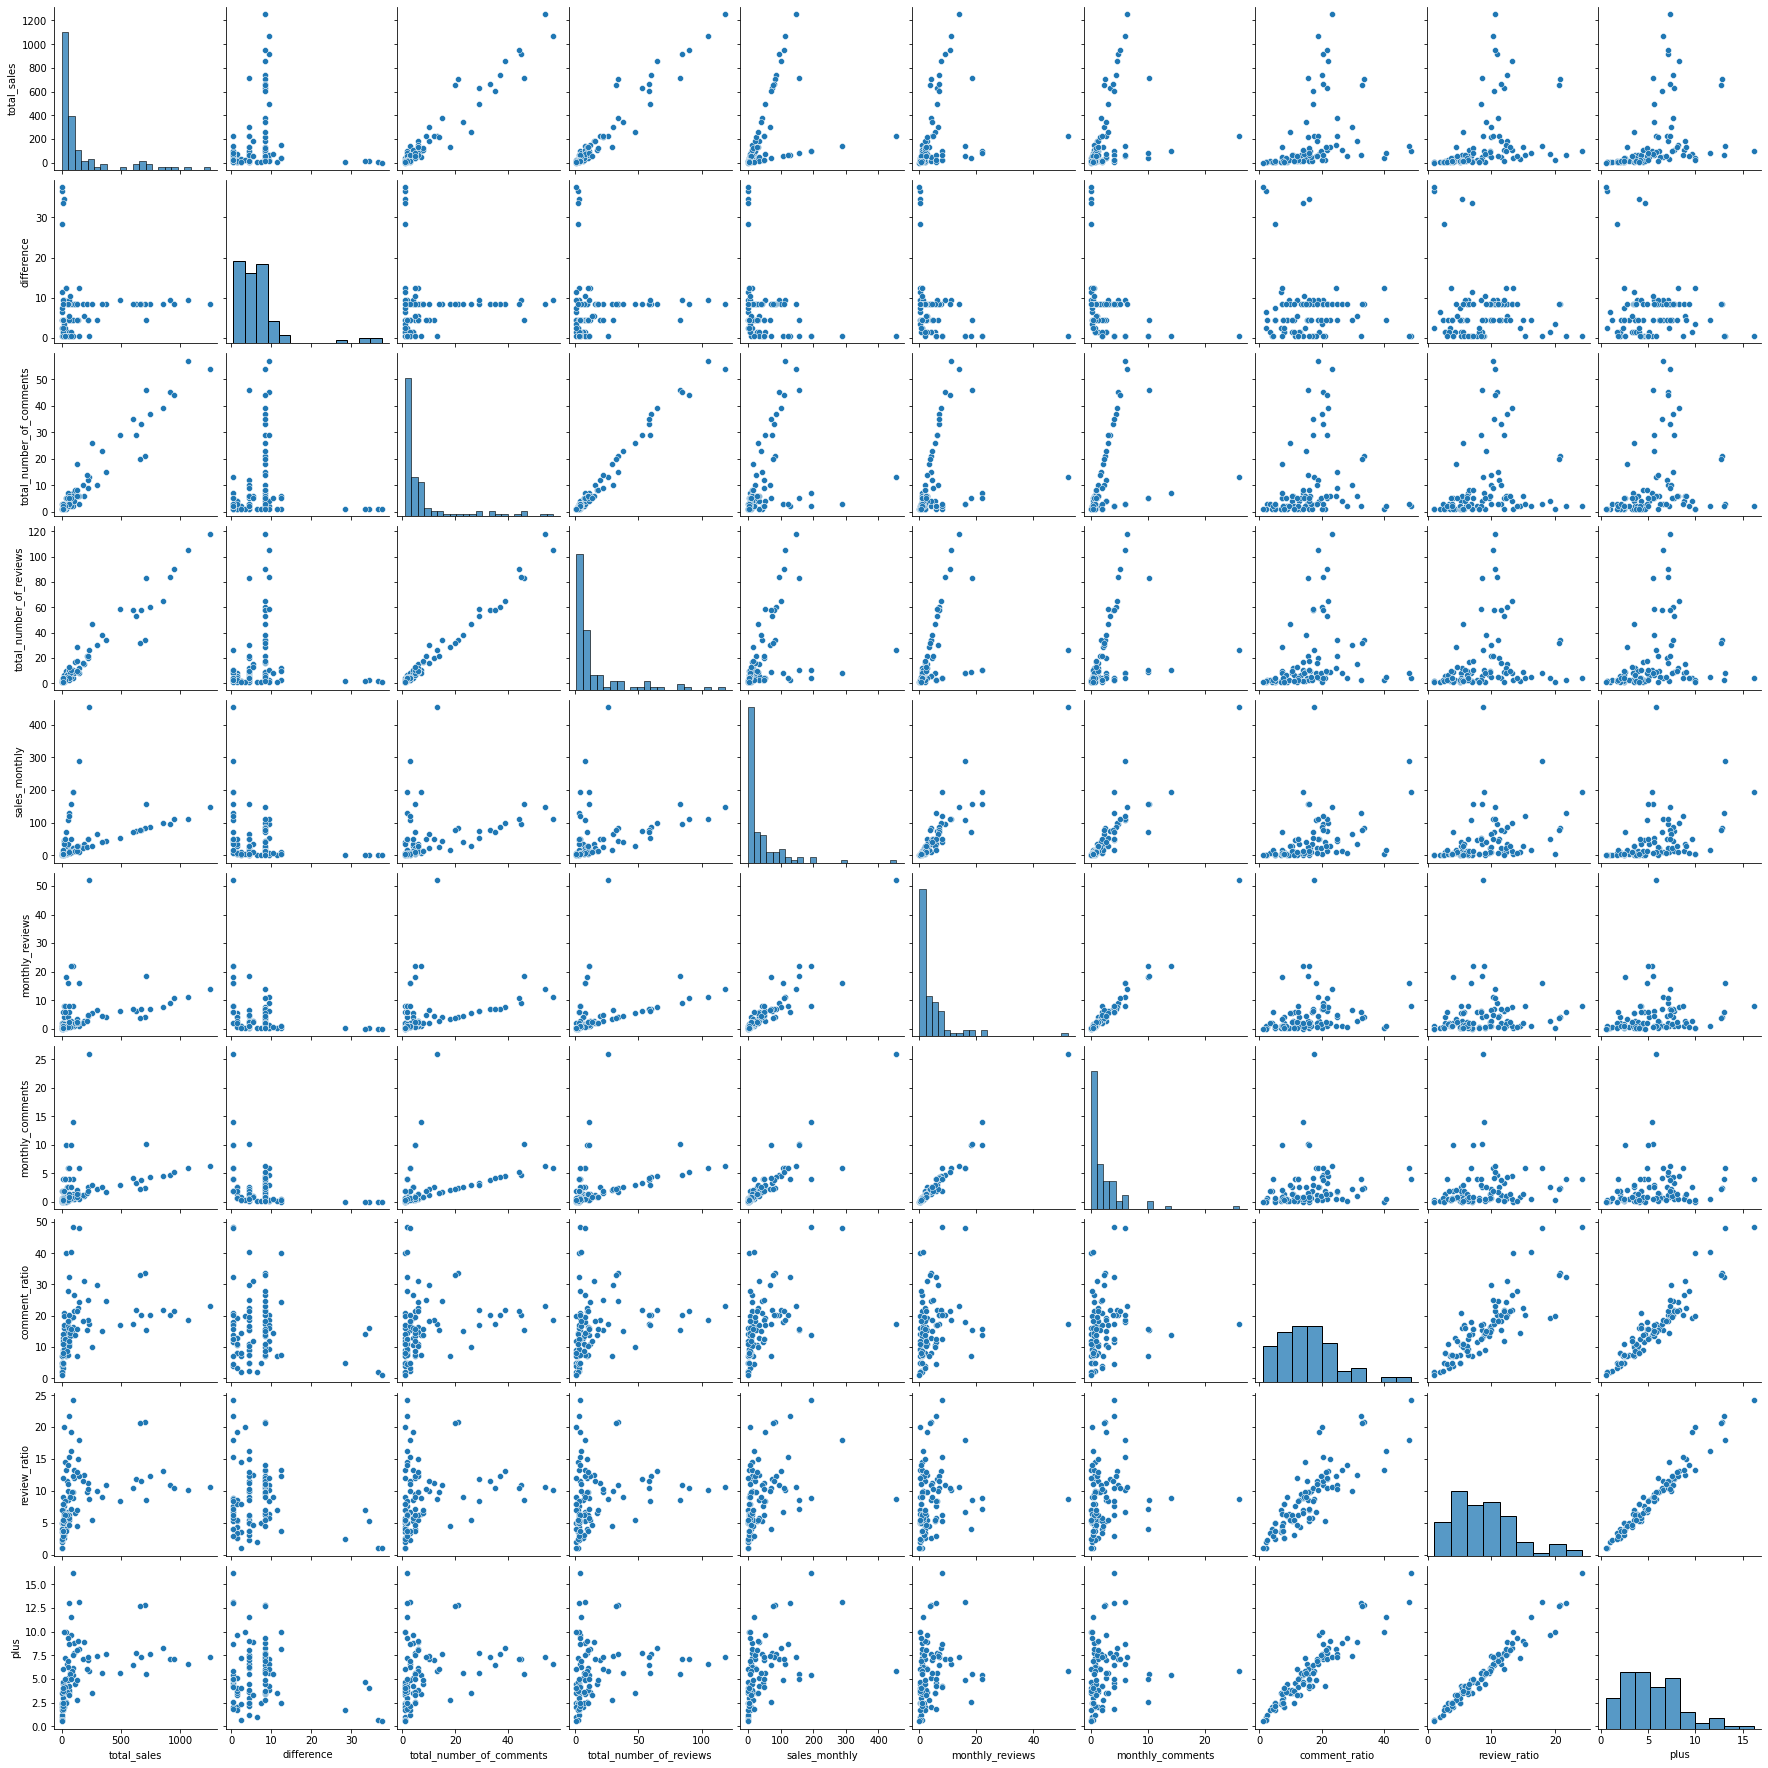

In [200]:
sns.pairplot(final)

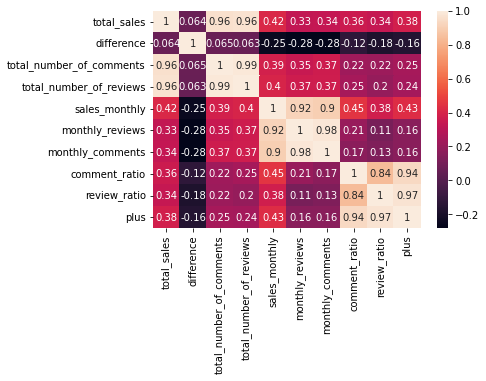

In [201]:
sns.heatmap(final.corr(),annot=True)

Dessision trees

splittind into training and validation sets

In [202]:
splits = RandomSplitter(valid_pct=0.2)(range_of(final))


In [203]:
from fastai.tabular.all import *


In [204]:
dep_var= 'total_sales'

In [205]:
to = TabularPandas(final, procs=[Normalize],cont_names=['total_number_of_comments','total_number_of_reviews'], y_names= dep_var,splits=splits)

In [206]:
#to = TabularPandas(final, procs=[Normalize,,Categorify],cont_names=['monthly_comments','total_sales','difference','total_number_of_comments','total_number_of_reviews','monthly_reviews'], y_names= 'sales_monthly',splits=splits)

In [207]:
to.xs.iloc[:50]


,total_number_of_comments,total_number_of_reviews
42,-0.656700,-0.595257
60,2.614282,2.892551
23,-0.656700,-0.635346
78,-0.428492,-0.274539
96,-0.580631,-0.555167
64,0.408271,0.647526
38,2.690352,2.652013
56,-0.276353,-0.234449
55,-0.352423,-0.354718
28,-0.504561,-0.595257


In [208]:
len(to.train),len(to.valid)

(79, 19)

In [209]:
#this set is what we will predect

In [210]:
to.valid

   listing  total_sales  difference  total_number_of_comments  \
57      57          184         8.5                  0.027924   
54      54           81         4.5                 -0.580631   
10      10            7         4.5                 -0.504561   
18      18            9         4.5                 -0.656700   
80      80            9         0.5                 -0.580631   
30      30            2        36.5                 -0.656700   
14      14           23         0.5                 -0.580631   
37      37          711         4.5                  2.766421   
8        8           65         4.5                 -0.276353   
68      68           20         3.5                 -0.656700   
25      25            8         1.5                 -0.656700   
9        9           16         1.5                 -0.580631   
7        7           46         4.5                 -0.504561   
97      97            8         2.5                 -0.656700   
33      33            1  

In [211]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [212]:
m = DecisionTreeRegressor(max_leaf_nodes=2)
m.fit(xs, y);

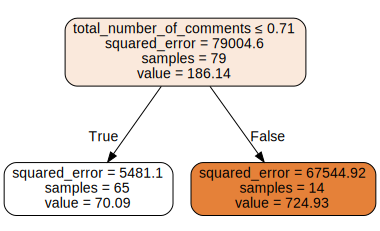

In [213]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

build a bigger tree. Here, we are not passing in any stopping criteria such as max_leaf_nodes

In [214]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [215]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [216]:
m_rmse(m, xs, y)

15.991513

In [217]:
m_rmse(m, valid_xs, valid_y)

55.761887

we might be overfitting pretty badly

In [218]:
m.get_n_leaves(), len(xs)

(49, 79)

We've got nearly as many leaf nodes as data points!

ensure every leaf node contains at least 10 records:

In [219]:
m = DecisionTreeRegressor(min_samples_leaf=2)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(32.099509, 52.242752)

In [220]:
m.get_n_leaves(), len(xs)

(27, 79)

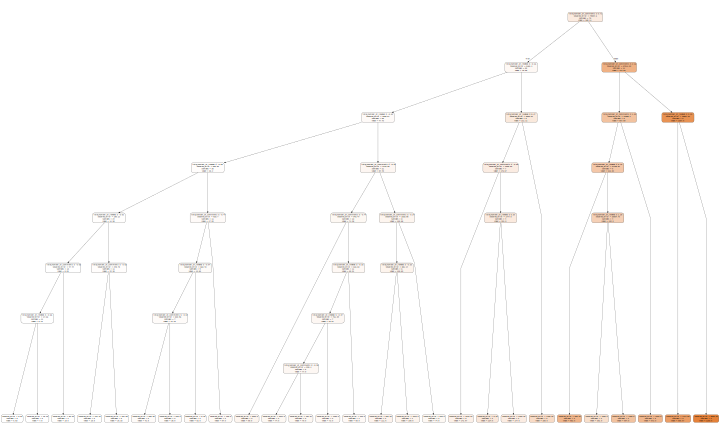

In [221]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

Random forests

In [222]:
def rf(xs, y, n_estimators=500, max_samples=50,
       max_features=0.5, min_samples_leaf=2, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [223]:
m = rf(xs, y);

In [224]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(64.24884, 54.039433)

In [225]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [226]:
r_mse(preds.mean(0), valid_y)

54.039433

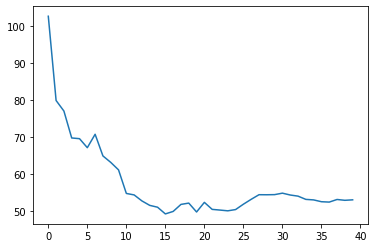

In [227]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [228]:
#out_of_bag_errors
r_mse(m.oob_prediction_, y)

91.756843

In [229]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [230]:
preds.shape

(500, 19)

In [231]:
preds_std = preds.std(0)

In [232]:
preds_std[:25]

array([ 62.30144019,  16.67976127,  18.7605268 ,   2.10942059,  10.53810517,   3.33253537,  10.53810517, 132.24613296,  30.81293106,   2.10942059,   2.10942059,  19.16123121,  18.61362716,
         2.10942059,   2.10942059,   3.33253537,  22.7156364 ,  15.41302896,  61.09299762])

In [233]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [234]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
1,total_number_of_reviews,0.507579
0,total_number_of_comments,0.492421


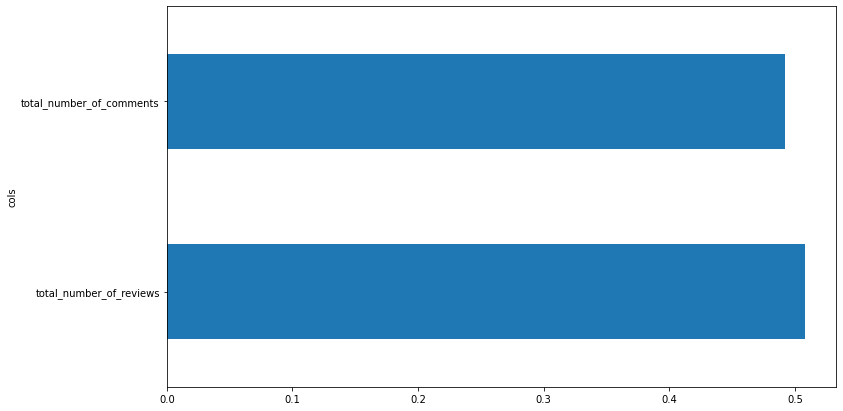

In [235]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:89: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hc.linkage(corr_condensed, method='average')


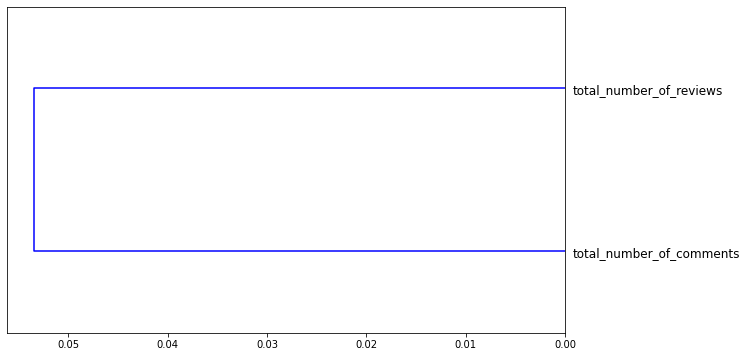

In [236]:
cluster_columns(xs)

In [237]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=500, min_samples_leaf=2,
        max_samples=50, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [238]:
#this thould be bigger number near 1

In [239]:
get_oob(xs)

0.8941043208183437

In [240]:
m = rf(xs, y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(64.480961, 56.412169)

In [241]:
!pip install treeinterpreter
!pip install waterfallcharts
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [242]:
row = valid_xs.iloc[:26]

In [243]:
to.valid

   listing  total_sales  difference  total_number_of_comments  \
57      57          184         8.5                  0.027924   
54      54           81         4.5                 -0.580631   
10      10            7         4.5                 -0.504561   
18      18            9         4.5                 -0.656700   
80      80            9         0.5                 -0.580631   
30      30            2        36.5                 -0.656700   
14      14           23         0.5                 -0.580631   
37      37          711         4.5                  2.766421   
8        8           65         4.5                 -0.276353   
68      68           20         3.5                 -0.656700   
25      25            8         1.5                 -0.656700   
9        9           16         1.5                 -0.580631   
7        7           46         4.5                 -0.504561   
97      97            8         2.5                 -0.656700   
33      33            1  

In [244]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [245]:
prediction[9], bias[9], contributions[9].sum()

(array([6.36071886]), 188.18735999999998, -181.82664114108115)

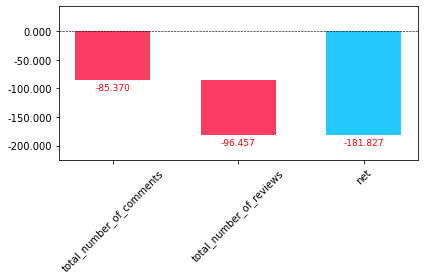

In [246]:
waterfall(valid_xs.columns, contributions[3], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

In [247]:
#cat_names=['listing']
#cont_names=['total_sales','difference','total_number_of_comments','average_comments_permonth','total_number_of_reviews','average_reviews_permonth']

In [248]:
#cat=Categorify()

In [249]:
#to=TabularPandas(df,cat,cat_names)

In [250]:
#cats=to.procs.categorify

In [251]:
#cats['listing']

In [252]:
#norm=Normalize()

In [253]:
#to=TabularPandas(df,norm,cont_names=cont_names)

In [254]:
#norms=to.procs.normalize

In [255]:
#norms.means

In [256]:
#norms.stds

In [257]:
#to.conts.head()

In [258]:
#fm=FillMissing(fill_strategy=FillStrategy.median)

In [259]:
#to=TabularPandas(df,fm,cont_names=cont_names)

In [260]:
#splits=RandomSplitter()(range_of(df))

In [261]:
#splits

In [262]:
#range_of(df)[:5],len(df)

In [263]:
#dep_var = 'monthly_sales'